In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install yfinance
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
df_stats = pd.read_csv("stock_data.csv")
df_hist = pd.read_csv("historical_data.csv", header = [0, 1], index_col = 0, parse_dates = True)
df_hist = df_hist.xs("Close", axis = 1, level = 1)

In [4]:
df_stats.head()

,Unnamed: 0,Symbol,Price,Change %,Volume,Rel Volume,Market cap,P/E,EPS dil TTM,EPS dil growth TTM YoY,Div yield % TTM,Sector,Analyst Rating,P/B,Unnamed: 13
0,0,CVX,160.76,-0.41%,6076000000,0.76,2889000000000,17.69,9.09,-32.44%,3.96%,Energy minerals,Buy,1.85,NaN
1,1,COP,113.76,+1.28%,5089000000,0.95,130928000000000,13.51,8.42,-8.01%,2.60%,Energy minerals,Buy,2.62,NaN
2,2,EOG,136.54,+1.47%,3061000000,1.01,76797000000000,10.99,12.42,-7.71%,3.82%,Energy minerals,Buy,2.61,NaN
3,3,PSX,131.32,+0.31%,2357000000,0.99,54234000000000,16.89,7.78,-53.08%,3.36%,Energy minerals,Buy,1.89,NaN
4,4,FANG,181.90,+3.00%,1968000000,0.88,53113000000000,10.42,17.46,-0.96%,6.09%,Energy minerals,Buy,1.42,NaN


In [5]:
df_hist.head()

Ticker,CRGY,TALO,CEIX,DVN,CTRA,APA,CNX,EOG,HCC,SM,...,IEP,VLO,AR,MTDR,FANG,MPC,VNOM,EQT,COP,RRC
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-08 00:00:00+00:00,16.820000,10.87,21.870001,44.910000,20.750000,26.629999,14.27,90.080002,23.190001,31.940001,...,50.770000,70.720001,17.219999,41.540001,113.629997,64.059998,22.270000,20.969999,74.110001,18.850000
2021-12-09 00:00:00+00:00,16.379999,10.29,21.190001,42.320000,20.820000,26.030001,14.25,88.879997,23.299999,31.540001,...,50.230000,70.309998,17.240000,40.430000,110.330002,63.340000,21.760000,20.709999,72.550003,18.990000
2021-12-10 00:00:00+00:00,16.000000,10.00,21.350000,43.419998,20.910000,26.670000,14.57,89.680000,22.490000,32.759998,...,50.099998,70.849998,17.410000,39.639999,111.180000,63.689999,21.620001,20.860001,73.489998,19.290001
2021-12-13 00:00:00+00:00,14.930000,9.61,20.510000,41.060001,20.459999,25.280001,13.93,88.029999,20.709999,30.180000,...,50.000000,68.220001,16.600000,37.180000,106.610001,61.810001,21.030001,20.120001,71.019997,18.459999
2021-12-14 00:00:00+00:00,14.500000,9.73,20.670000,40.340000,20.090000,24.950001,13.89,85.300003,21.230000,29.219999,...,49.720001,68.190002,16.320000,36.720001,104.070000,62.450001,20.540001,21.270000,70.680000,18.010000


In [6]:
"""

Call if you want to redownload data with different tickers or time range

tickers = df_stats["Symbol"].map(lambda x: x.split(" ")[0])
df_hist = yf.download(list(tickers.values), period = "max", interval = "1d", group_by = "tickers")
df_hist.dropna(inplace = True)
df_hist.to_csv("historical_data.csv")

"""

'\n\nCall if you want to redownload data with different tickers or time range\n\ntickers = df_stats["Symbol"].map(lambda x: x.split(" ")[0])\ndf_hist = yf.download(list(tickers.values), period = "max", interval = "1d", group_by = "tickers")\ndf_hist.dropna(inplace = True)\ndf_hist.to_csv("historical_data.csv")\n\n'

In [7]:
#using cboe 30 year treasury yield index as a proxy for risk free rate
#remember to divide by 252 (# of trading days in a year) to make daily risk free rate

#daily_risk_free_rate = yf.download("^TYX", period = "max", interval = "1d", group_by = "tickers").iloc[-len(df_hist):] / 252
#daily_risk_free_rate.to_csv("risk_free.csv")

daily_risk_free_rate = pd.read_csv("risk_free.csv", header = [0, 1], index_col = 0, parse_dates = True)
daily_risk_free_rate = daily_risk_free_rate.xs("Close", axis = 1, level = 1)["^TYX"]

In [8]:
df_hist.columns

Index(['CRGY', 'TALO', 'CEIX', 'DVN', 'CTRA', 'APA', 'CNX', 'EOG', 'HCC', 'SM',
       'MGY', 'EXE', 'HES', 'HESM', 'BTU', 'MRO', 'NFG', 'PR', 'OVV', 'ARCH',
       'AMR', 'DINO', 'NOG', 'ARLP', 'CIVI', 'MUR', 'GPOR', 'CHRD', 'CRK',
       'CRC', 'CVX', 'PSX', 'OXY', 'PBF', 'IEP', 'VLO', 'AR', 'MTDR', 'FANG',
       'MPC', 'VNOM', 'EQT', 'COP', 'RRC'],
      dtype='object', name='Ticker')

In [9]:
#some data engineering to create the fama 3 data

#pick some energy company, entirely up to you, just pick from above
asset = "DVN"

df_fama_3 = pd.DataFrame()
df_fama_3.index = df_hist.index[1:]

#subtract R_f from R_m (the average return of our entire portfolio, which I've designated as market) - feel free to pull better data ^SNP or ^IXIC if youd like
df_fama_3["Mkt_Returns"] = df_hist.pct_change()[1:].mean(axis = 1) - daily_risk_free_rate
df_fama_3["Asset_Returns"] = df_hist[asset].pct_change()[1:].mean() - daily_risk_free_rate

#top N percent, and bottom N percent
mkt_cap_threshold = .3

top_n_mkt_cap = df_stats["Symbol"][df_stats["Market cap"] > df_stats["Market cap"].quantile(1 - mkt_cap_threshold)]
bot_n_mkt_cap = df_stats["Symbol"][df_stats["Market cap"] < df_stats["Market cap"].quantile(mkt_cap_threshold)]

df_fama_3["SMB"] = df_hist[bot_n_mkt_cap].pct_change()[1:].mean(axis = 1) - df_hist[top_n_mkt_cap].pct_change()[1:].mean(axis = 1)

#try coding HML, we will go over together (note, book-to-market = 1 / price-to-book)

df_stats["B/M"] = 1 / df_stats["P/B"]

df_fama_3["HML"] = df_hist[df_stats["Symbol"][df_stats["B/M"] > df_stats["B/M"].quantile(1 - mkt_cap_threshold)]].pct_change()[1:].mean(axis = 1) - df_hist[df_stats["Symbol"][df_stats["B/M"] < df_stats["B/M"].quantile(mkt_cap_threshold)]].pct_change()[1:].mean(axis = 1)

In [36]:
df_fama_3["date"] = df_fama_3.index.map(lambda x: x.toordinal())
df_fama_3["date"] /= df_fama_3["date"].max()
df_fama_3["date2"] = df_fama_3["date"]**2
df_fama_3

,Mkt_Returns,Asset_Returns,SMB,HML,date,date^2,date2
Date,,,,,,,
2021-12-09 00:00:00+00:00,-0.024085,-0.007274,-0.003706,-0.009814,0.998546,0.997094,0.997094
2021-12-10 00:00:00+00:00,-0.002643,-0.007345,-0.015461,0.005350,0.998547,0.997096,0.997096
2021-12-13 00:00:00+00:00,-0.044336,-0.007060,0.007634,-0.018688,0.998551,0.997104,0.997104
2021-12-14 00:00:00+00:00,-0.015379,-0.007083,0.001740,-0.003790,0.998553,0.997107,0.997107
2021-12-15 00:00:00+00:00,-0.001133,-0.007230,0.016613,-0.008612,0.998554,0.997110,0.997110
...,...,...,...,...,...,...,...
2024-11-12 00:00:00+00:00,-0.031779,-0.018032,-0.014463,-0.003794,0.999992,0.999984,0.999984
2024-11-13 00:00:00+00:00,-0.014807,-0.018270,-0.008177,0.001588,0.999993,0.999986,0.999986
2024-11-14 00:00:00+00:00,-0.014255,-0.018056,0.000467,0.009554,0.999995,0.999989,0.999989


In [37]:
training_pct = 1
training_index = int(len(df_fama_3) * training_pct)

df_train = df_fama_3[:training_index]
df_test = df_fama_3[training_index:]

In [42]:
import statsmodels.formula.api as smf

model = smf.ols("Asset_Returns ~ (Mkt_Returns + SMB + HML) * date + date + date2", df_train)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          Asset_Returns   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     716.1
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:27:56   Log-Likelihood:                 4053.7
No. Observations:                 740   AIC:                            -8089.
Df Residuals:                     731   BIC:                            -8048.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7651.4277    241.458  

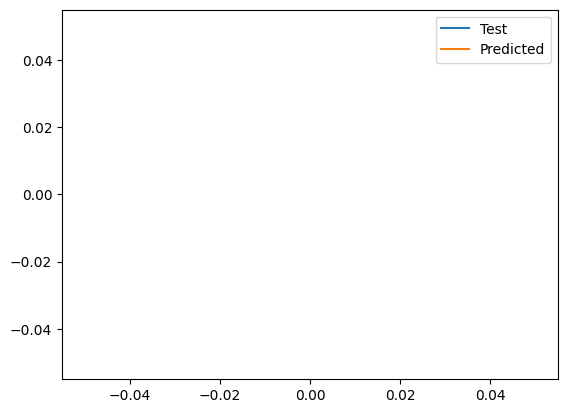

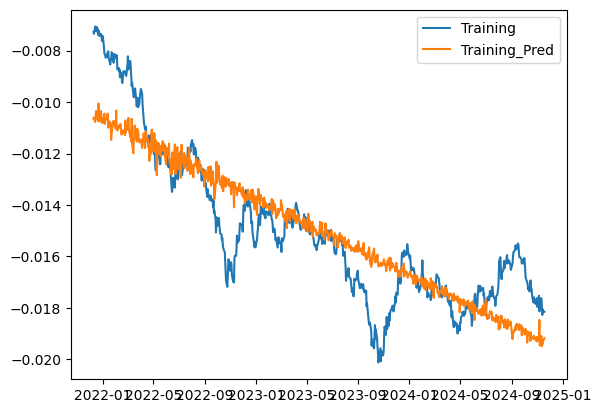

In [41]:
plt.plot(df_test["Asset_Returns"], label = "Test")
plt.plot(result.predict(df_test), label = "Predicted")

plt.legend()
plt.show()

plt.plot(df_train["Asset_Returns"], label = "Training")
plt.plot(result.predict(df_train), label = "Training_Pred")

plt.legend()
plt.show()